# Little notebook to plot HNL constraints (mixing vs mass)

### A little module that compiles all constraints together

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from Nlimits import *

In [11]:
import numpy as np
from matplotlib import rc, rcParams
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from scipy import interpolate
import scipy.stats
import sys
import scipy.ndimage as ndimage
import os
from scipy import interpolate
import matplotlib.tri as tri

### aux plotting functions

In [12]:
def plot_ID_individual(axis,listoffiles):
    for i in range(np.size(listoffiles)):
        filename = listoffiles[i]

        if (np.size(filename) == 2):
            name = PATH+filename[0]
        else:
            name = PATH+filename

        m4, Umu4sq = np.genfromtxt(name, unpack=True)
        
        ax.plot(m4/3.0,ualpha4SQR(m4/3.0,gX,m4),label=labels[i],color=colors[i])


# ELECTRON

In [13]:
label={"e" : r"$|U_{e 4}|^2$", 
       "mu" : r"$|U_{\mu 4}|^2$", 
       "tau" : r"$|U_{\tau 4}|^2$"}

In [16]:
def plot_all_lines(flavor, save=False):
    fsize = 11
    rc('text', usetex=True)
    params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
                    'figure.figsize':(2*3.375,1.5*2.375)	}
    rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
    rcParams.update(params)
    axes_form  = [0.1,0.16,0.85,0.76]


    fig = plt.figure()
    ax = fig.add_axes(axes_form)

    ################################
    # range of N mass
    MN_MIN = 1e-3 # GeV
    MN_MAX = 1e1 # GeV
    MN = np.logspace(np.log10(MN_MIN),np.log10(MN_MAX),1000)

    ##############################################
    # decide on a flavor
    if flavor == 'e':
        usqr_bound = ue4.USQR(MN)
    elif flavor == 'mu':
        usqr_bound = umu4.USQR(MN)
    elif flavor == 'tau':
        usqr_bound = utau4.USQR(MN)
    else:
        print("Could not determine flavor:", flavor)
        sys.exit()

    ##############################################
    # Constraints on U\alpha4^2
    ax.plot(MN, usqr_bound, color='navy', )
    ax.fill_between(MN, usqr_bound, np.ones(np.size(MN)), 
                    fc='dodgerblue', ec='None', lw =0.0, alpha=0.5, label=r'MH bounds')


    ax.set_title(r"Some plot",fontsize=fsize)
    ax.legend(loc='lower right', frameon=False)
    ax.set_xlim(MN_MIN,MN_MAX)
    ax.set_ylim(1e-10,1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(label[flavor])
    ax.set_xlabel(r"$m_{N}$/GeV")
    ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])
    ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.2)
    if save:
        fig.savefig('plots/u'+flavor+'4.pdf')
    return ax, fig

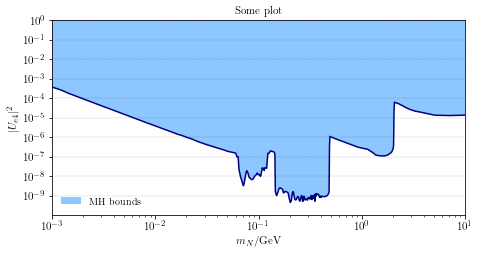

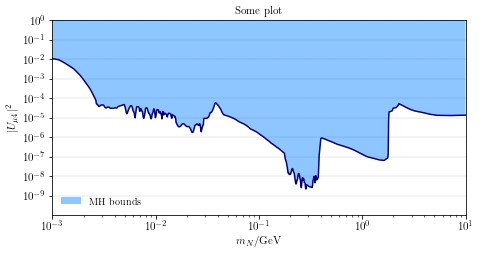

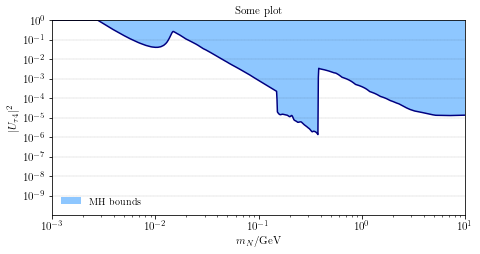

In [17]:
axe, fige = plot_all_lines('e')
axmu, figmu = plot_all_lines('mu')
axtau, figtau = plot_all_lines('tau')

leg2 = axe.legend(loc='lower left', frameon=False)
fige.savefig("plots/comparison_e_new.pdf")

leg2 = axmu.legend(loc='lower left', frameon=False)
figmu.savefig("plots/comparison_mu_new.pdf")

leg2 = axtau.legend(loc='lower left', frameon=False)
figtau.savefig("plots/comparison_tau_new.pdf")

### Individual bounds

In [25]:
from Nlimits.plot_tools import *

/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


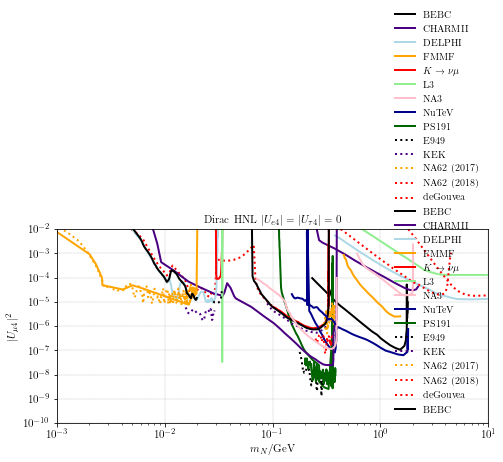

In [49]:
fig, ax = std_fig(figsize=(2*3.7,1.5*2.3617))


umu4.individual_bounds(ax, umu4.files_umu4)

ax.set_title(r"Dirac HNL $|U_{e4}| = |U_{\tau 4}| = 0$",fontsize=fsize)
ax.legend(loc='lower right', frameon=False)
ax.set_xlim(1e-3,10)
ax.set_ylim(1e-10,1e-2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r'$|U_{\mu4}|^2$')
ax.set_xlabel(r"$m_{N}$/GeV")
ax.set_yticks([1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.2)
ax.grid(axis='x', which='major',dashes=(6,1),alpha=0.5,c='black',lw=0.2)

fig.savefig("plots/Umu4SQR.pdf")
fig.savefig("plots/Umu4SQR.png", dpi=400)